# MAST30034 Project 2
## Rental Prediction ---- Focusing on GLM with various families & Penalty Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols, glm
import statistics

import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
# Read the dataframe.

gpd_domain = pd.read_csv('../data/curated/df_model.csv')

In [3]:
gpd_domain

,Unnamed: 0,Unnamed: 0.1,name,Postcode,Prices,Bedrooms,Bathrooms,Parkings,geometry,SA2_code,...,Latitude,popu2022,popu2025,Income2022,Income2025,hos_count,stop_count,school_count,distance,pct
0,0,0,1/62 Simpson St East Melbourne VIC 3002,3002,395.0,1,1,0,POINT (144.9891076 -37.8106659),206041119,...,144.989108,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.640393,1.0
1,1,1,29/8 Wellington Crescent East Melbourne VIC 3002,3002,750.0,2,2,2,POINT (144.9776702 -37.8172238),206041119,...,144.977670,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.127094,1.0
2,2,2,811v/162 Albert Street East Melbourne VIC 3002,3002,600.0,2,1,1,POINT (144.9855313 -37.8100432),206041119,...,144.985531,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.317094,1.0
3,3,3,203/33 Cliveden Close East Melbourne VIC 3002,3002,380.0,1,1,1,POINT (144.9767157 -37.8171001),206041119,...,144.976716,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,1.993894,1.0
4,5,5,107K/211 Powlett Street East Melbourne VIC 3002,3002,550.0,1,1,1,POINT (144.9859936 -37.8096989),206041119,...,144.985994,4965.669440,4555.306297,98664.943495,102957.654101,6.0,1.0,1.0,2.114494,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,4902,4902,33 Ritchie Drive Clyde North VIC 3978,3978,450.0,4,2,2,POINT (145.3370537 -38.1137329),212031556,...,145.337054,28812.714834,103901.443821,69737.528612,76306.170584,0.0,0.0,1.0,54.314448,1.0
4552,4903,4903,8 Cropping Street Clyde North VIC 3978,3978,495.0,4,2,2,POINT (145.386116 -38.1042218),212031556,...,145.386116,28812.714834,103901.443821,69737.528612,76306.170584,0.0,0.0,1.0,56.476442,1.0
4553,4904,4904,37 Barley Crescent Clyde North VIC 3978,3978,470.0,4,2,2,POINT (145.3570598 -38.08415),212031555,...,145.357060,14034.992778,26309.739852,69737.528612,76306.170584,0.0,0.0,2.0,53.276851,1.0
4554,4905,4905,6 Viewbright Road Clyde North VIC 3978,3978,535.0,4,2,2,POINT (145.3545777 -38.0808423),212031555,...,145.354578,14034.992778,26309.739852,69737.528612,76306.170584,0.0,0.0,2.0,51.284857,1.0


1. Now split our dataframe into two parts, the 'train_df' with data in 2022, and the 'predict_df' with data in 2025.

In [4]:
# train_df (data in 2022).

train_df = gpd_domain.drop(['popu2025', 'Income2025'], axis=1)
train_df = train_df.rename({'popu2022': 'popu', 'Income2022': 'Income'}, axis=1)  

In [5]:
train_df

,Unnamed: 0,Unnamed: 0.1,name,Postcode,Prices,Bedrooms,Bathrooms,Parkings,geometry,SA2_code,Longitude,Latitude,popu,Income,hos_count,stop_count,school_count,distance,pct
0,0,0,1/62 Simpson St East Melbourne VIC 3002,3002,395.0,1,1,0,POINT (144.9891076 -37.8106659),206041119,-37.810666,144.989108,4965.669440,98664.943495,6.0,1.0,1.0,2.640393,1.0
1,1,1,29/8 Wellington Crescent East Melbourne VIC 3002,3002,750.0,2,2,2,POINT (144.9776702 -37.8172238),206041119,-37.817224,144.977670,4965.669440,98664.943495,6.0,1.0,1.0,2.127094,1.0
2,2,2,811v/162 Albert Street East Melbourne VIC 3002,3002,600.0,2,1,1,POINT (144.9855313 -37.8100432),206041119,-37.810043,144.985531,4965.669440,98664.943495,6.0,1.0,1.0,2.317094,1.0
3,3,3,203/33 Cliveden Close East Melbourne VIC 3002,3002,380.0,1,1,1,POINT (144.9767157 -37.8171001),206041119,-37.817100,144.976716,4965.669440,98664.943495,6.0,1.0,1.0,1.993894,1.0
4,5,5,107K/211 Powlett Street East Melbourne VIC 3002,3002,550.0,1,1,1,POINT (144.9859936 -37.8096989),206041119,-37.809699,144.985994,4965.669440,98664.943495,6.0,1.0,1.0,2.114494,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,4902,4902,33 Ritchie Drive Clyde North VIC 3978,3978,450.0,4,2,2,POINT (145.3370537 -38.1137329),212031556,-38.113733,145.337054,28812.714834,69737.528612,0.0,0.0,1.0,54.314448,1.0
4552,4903,4903,8 Cropping Street Clyde North VIC 3978,3978,495.0,4,2,2,POINT (145.386116 -38.1042218),212031556,-38.104222,145.386116,28812.714834,69737.528612,0.0,0.0,1.0,56.476442,1.0
4553,4904,4904,37 Barley Crescent Clyde North VIC 3978,3978,470.0,4,2,2,POINT (145.3570598 -38.08415),212031555,-38.084150,145.357060,14034.992778,69737.528612,0.0,0.0,2.0,53.276851,1.0
4554,4905,4905,6 Viewbright Road Clyde North VIC 3978,3978,535.0,4,2,2,POINT (145.3545777 -38.0808423),212031555,-38.080842,145.354578,14034.992778,69737.528612,0.0,0.0,2.0,51.284857,1.0


In [6]:
# predict_df (data in 2025).

predict_df = gpd_domain.drop(['popu2022', 'Income2022'], axis=1)
predict_df = predict_df.rename({'popu2025': 'popu', 'Income2025': 'Income'}, axis=1)

In [7]:
predict_df

,Unnamed: 0,Unnamed: 0.1,name,Postcode,Prices,Bedrooms,Bathrooms,Parkings,geometry,SA2_code,Longitude,Latitude,popu,Income,hos_count,stop_count,school_count,distance,pct
0,0,0,1/62 Simpson St East Melbourne VIC 3002,3002,395.0,1,1,0,POINT (144.9891076 -37.8106659),206041119,-37.810666,144.989108,4555.306297,102957.654101,6.0,1.0,1.0,2.640393,1.0
1,1,1,29/8 Wellington Crescent East Melbourne VIC 3002,3002,750.0,2,2,2,POINT (144.9776702 -37.8172238),206041119,-37.817224,144.977670,4555.306297,102957.654101,6.0,1.0,1.0,2.127094,1.0
2,2,2,811v/162 Albert Street East Melbourne VIC 3002,3002,600.0,2,1,1,POINT (144.9855313 -37.8100432),206041119,-37.810043,144.985531,4555.306297,102957.654101,6.0,1.0,1.0,2.317094,1.0
3,3,3,203/33 Cliveden Close East Melbourne VIC 3002,3002,380.0,1,1,1,POINT (144.9767157 -37.8171001),206041119,-37.817100,144.976716,4555.306297,102957.654101,6.0,1.0,1.0,1.993894,1.0
4,5,5,107K/211 Powlett Street East Melbourne VIC 3002,3002,550.0,1,1,1,POINT (144.9859936 -37.8096989),206041119,-37.809699,144.985994,4555.306297,102957.654101,6.0,1.0,1.0,2.114494,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,4902,4902,33 Ritchie Drive Clyde North VIC 3978,3978,450.0,4,2,2,POINT (145.3370537 -38.1137329),212031556,-38.113733,145.337054,103901.443821,76306.170584,0.0,0.0,1.0,54.314448,1.0
4552,4903,4903,8 Cropping Street Clyde North VIC 3978,3978,495.0,4,2,2,POINT (145.386116 -38.1042218),212031556,-38.104222,145.386116,103901.443821,76306.170584,0.0,0.0,1.0,56.476442,1.0
4553,4904,4904,37 Barley Crescent Clyde North VIC 3978,3978,470.0,4,2,2,POINT (145.3570598 -38.08415),212031555,-38.084150,145.357060,26309.739852,76306.170584,0.0,0.0,2.0,53.276851,1.0
4554,4905,4905,6 Viewbright Road Clyde North VIC 3978,3978,535.0,4,2,2,POINT (145.3545777 -38.0808423),212031555,-38.080842,145.354578,26309.739852,76306.170584,0.0,0.0,2.0,51.284857,1.0


## 1. Ordinary Least Square

In [8]:
ols_fit = ols(
    formula="Prices ~ Bedrooms + Bathrooms + Parkings + popu + Income + hos_count + \
                stop_count + school_count + distance",
    data=train_df
).fit()

In [9]:
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Prices   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     411.0
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:12:55   Log-Likelihood:                -26890.
No. Observations:                4556   AIC:                         5.380e+04
Df Residuals:                    4546   BIC:                         5.386e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       56.2102     10.019      5.610   

## 2. Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
X = gpd_domain.loc[ : , ['Bedrooms', 'Bathrooms', 'Parkings', 'popu2022', 'Income2022', 'hos_count',
                'stop_count', 'school_count', 'distance']]
y = gpd_domain[['Prices']]

model = LinearRegression()
model.fit(X,y)

cv = cross_val_score(model, X, y, cv=10)

In [11]:
statistics.mean(cv)

0.3865045171914526

## 3. GLM with Gamma Family

In [12]:
from statsmodels.api import families

# statsmodels glm
gamma_fit = glm(
    formula="Prices ~ Bedrooms + Bathrooms + Parkings + popu + Income + hos_count + \
                stop_count + school_count + distance",
    data=train_df, 
    family=families.Gamma()
).fit()

print(gamma_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Prices   No. Observations:                 4556
Model:                            GLM   Df Residuals:                     4546
Model Family:                   Gamma   Df Model:                            9
Link Function:          inverse_power   Scale:                        0.038188
Method:                          IRLS   Log-Likelihood:                -26810.
Date:                Wed, 05 Oct 2022   Deviance:                       168.75
Time:                        15:13:02   Pearson chi2:                     174.
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0039   4.63e-05     85.197   

/Users/kitty/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [13]:
print(gamma_fit.aic)

53640.787677937726


### Residual vs Fitted Value Plot

In [14]:
%matplotlib inline

plt.style.use('seaborn')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [15]:
# fitted values (need a constant term for intercept)
model_fitted_y = gamma_fit.fittedvalues

# model residuals
model_residuals = gamma_fit.resid_deviance

# normalized residuals
#model_norm_residuals = fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
#model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = gamma_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = gamma_fit.get_influence().cooks_distance[0]

Text(0, 0.5, 'Residuals')

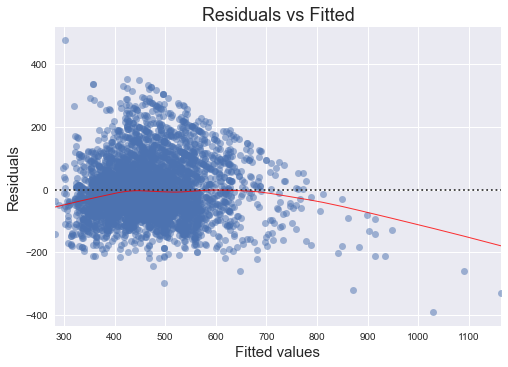

In [16]:
#  Plot
plot = sns.residplot(x=model_fitted_y, y='Prices', data=train_df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

## 4. GLM with Poisson Family

In [17]:
# statsmodels glm
pos_fit = glm(
    formula="Prices ~ Bedrooms + Bathrooms + Parkings + popu + Income + hos_count + \
                stop_count + school_count + distance",
    data=train_df, 
    family=families.Poisson()
).fit()

print(pos_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Prices   No. Observations:                 4556
Model:                            GLM   Df Residuals:                     4546
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55488.
Date:                Wed, 05 Oct 2022   Deviance:                       74763.
Time:                        15:13:12   Pearson chi2:                 7.68e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.2730      0.005   1003.087   

In [18]:
print(pos_fit.aic)

110995.53074091046


### Residual vs Fitted Value Plot

In [19]:
%matplotlib inline

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [20]:
# fitted values (need a constant term for intercept)
model_fitted_y = pos_fit.fittedvalues

# model residuals
model_residuals = pos_fit.resid_deviance

# normalized residuals
#model_norm_residuals = fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
#model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = pos_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = pos_fit.get_influence().cooks_distance[0]

Text(0, 0.5, 'Residuals')

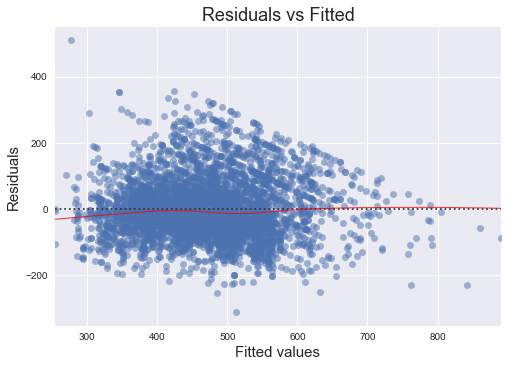

In [21]:
#  Plot
plot = sns.residplot(x=model_fitted_y, y='Prices', data=train_df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

### QQ Plot

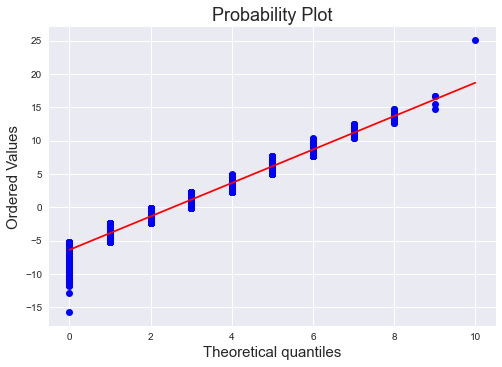

In [22]:
import scipy.stats as stats
#fig = sm.qqplot(model_residuals,fit=True, dist='poisson')
stats.probplot(model_residuals, dist='poisson', sparams=(2.5,), plot=plt)
plt.show()

In [23]:
# Predict using 2025 data.

pos_predict = pos_fit.predict(predict_df)
pos_predict

0       477.089266
1       610.611522
2       533.758052
3       482.558279
4       482.532901
           ...    
4551    473.003977
4552    472.558229
4553    557.856998
4554    558.341813
4555    558.399595
Length: 4556, dtype: float64

## 5. GLM with Gaussian Family

In [24]:
gaus_fit = glm(
    formula="Prices ~ Bedrooms + Bathrooms + Parkings + popu + Income + hos_count + \
                stop_count + school_count + distance",
    data=train_df, 
    family=families.Gaussian()
).fit()

print(gaus_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Prices   No. Observations:                 4556
Model:                            GLM   Df Residuals:                     4546
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                          7851.1
Method:                          IRLS   Log-Likelihood:                -26890.
Date:                Wed, 05 Oct 2022   Deviance:                   3.5691e+07
Time:                        15:13:26   Pearson chi2:                 3.57e+07
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       56.2102     10.019      5.610   

In [25]:
print(gaus_fit.aic)

53799.433797456506


In [26]:
%matplotlib inline

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [27]:
# fitted values (need a constant term for intercept)
model_fitted_y = gaus_fit.fittedvalues

# model residuals
model_residuals = gaus_fit.resid_deviance

# normalized residuals
#model_norm_residuals = fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
#model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = gaus_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = gaus_fit.get_influence().cooks_distance[0]

### Residual vs Fitted Value Plot

Text(0, 0.5, 'Residuals')

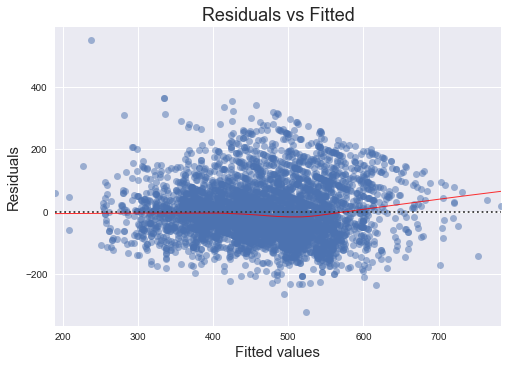

In [28]:
#  Plot
plot = sns.residplot(x=model_fitted_y, y='Prices', data=train_df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')

### QQ Plot

/Users/kitty/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


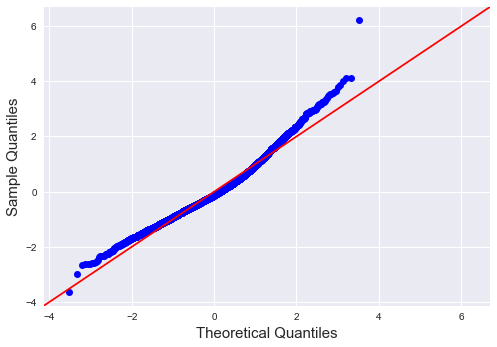

In [29]:
fig = sm.qqplot(model_residuals,line='45', fit=True)
plt.show()

In [30]:
# Predict using 2025 data.

gaus_predict = gaus_fit.predict(predict_df)
gaus_predict

0       485.013121
1       602.074612
2       536.156446
3       490.110782
4       490.091605
           ...    
4551    466.901351
4552    466.557558
4553    554.179091
4554    554.495851
4555    554.533585
Length: 4556, dtype: float64

## Ridge Regression

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X = train_df.loc[ : , ['Bedrooms', 'Bathrooms', 'Parkings', 'popu', 'Income', 'hos_count',
                'stop_count', 'school_count', 'distance']]
y = train_df[['Prices']]

In [33]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [34]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [35]:
# Cross validation for choosing the best parameter.

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.008737642000038414

In [36]:
# Train the ridge model using the parameter we derived.

ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))
r2_score(y_test, ridge.predict(X_test))

0.43509620334028865

In [37]:
ridge.coef_
#pd.Series(ridge.coef_, index = X.columns)

array([[ 4.65489551e+01,  6.24823109e+01,  4.35486649e+00,
        -1.14999628e-03,  3.06204574e-03,  3.67917379e+00,
         5.65590328e+00, -4.53880012e-01, -1.35070914e-01]])

In [38]:
# Predict the prices
X = predict_df.loc[ : , ['Bedrooms', 'Bathrooms', 'Parkings', 'popu', 'Income', 'hos_count',
                'stop_count', 'school_count', 'distance']]

ridge_pred = ridge.predict(X)

In [39]:
ridge_pred

array([[488.44603547],
       [606.25636617],
       [539.39352538],
       ...,
       [557.63502664],
       [557.90408715],
       [557.93613939]])

## Lasso Regression

In [40]:
# Cross validation for choosing the best parameter.

lasso = Lasso(max_iter = 10000, normalize = True)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso = lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))
r2_score(y_test, lasso.predict(X_test))

/Users/kitty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.4347370081088817

In [41]:
pd.Series(lasso.coef_, index=X.columns)

Bedrooms        46.710608
Bathrooms       62.419343
Parkings         3.956079
popu            -0.001093
Income           0.003082
hos_count        3.623783
stop_count       5.243555
school_count    -0.370920
distance        -0.133027
dtype: float64

In [42]:
# Predict the prices
X = predict_df.loc[ : , ['Bedrooms', 'Bathrooms', 'Parkings', 'popu', 'Income', 'hos_count',
                'stop_count', 'school_count', 'distance']]

lasso_pred = lasso.predict(X)

In [43]:
lasso_pred

array([488.27124697, 605.38163918, 538.9809416 , ..., 558.72214749,
       558.98713723, 559.01870453])

## Gradient Boosting Regressor

In [44]:
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')
clf.fit(X_train, y_train)


/Users/kitty/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(max_depth=5)

In [45]:
clf.score(X_test, y_test)

0.5935110819397529